In [75]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_pdes.jl");
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");
include("/home/jm2386/Active_Lattice/src/pm_plot.jl");
include("/home/jm2386/Active_Lattice/src/Hetrocline.jl");

v3.0
v4.0


In [168]:
function cp_param(i)
    DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ = (1.0, 7.5, 1.0, 100, 0.05, 25.0, 0.5, 0.1,0.1,1e-5, 0.1);
    ϕa,ϕp = [(x,y) for x in 0.1:0.02:1.0, y in 0.0:0.01:0.4 if x+y<1][i]
    T, save_interval, param_name, pert = (2000.0, 10.0, "cp_experiment", "double")
    param = new_param(DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true, pert= pert)
    return param
end
function cp_param_coord(ϕa,ϕp)
    DT, v0, DR, N, Δx, Lx, Ly, _, _, δt, δ = (1.0, 7.5, 1.0, 100, 0.05, 25.0, 0.5, 0.1,0.1,1e-5, 0.1);
    T, save_interval, param_name, pert = (2000.0, 10.0, "cp_experiment", "double")
    param = new_param(DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true, pert= pert)
    return param
end
nmax, cmax, dcmax = 0, 0, 0
function f_dots(param, fs)
    nmax, cmax, dcmax = 0, 0, 0
    for f in fs
        normf, c, dc = f_dot(param, f)
        nmax, cmax, dcmax = max(normf,nmax), max(abs(c),cmax), max(abs(dc),dcmax)
    end
    return nmax, cmax, dcmax
end
function tp_param(i)
    DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ = (1.0, 7.5, 1.0, 100, 0.05, 25.0, 0.5, 0.1,0.1,1e-5, 0.1);
    ϕa,ϕp = [(x,y) for x in 0.1:0.02:1.0, y in 0.0:0.01:0.4 if x+y<1][i]
    T, save_interval, param_name, pert = (2000.0, 10.0, "tp_experiment", "single")
    param = new_param(DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true, pert= pert)
    return param
end
function tp_param_coord(ϕa,ϕp)
    DT, v0, DR, N, Δx, Lx, Ly, _, _, δt, δ = (1.0, 7.5, 1.0, 100, 0.05, 25.0, 0.5, 0.1,0.1,1e-5, 0.1);
    T, save_interval, param_name, pert = (2000.0, 10.0, "tp_experiment", "single")
    param = new_param(DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true, pert= pert)
    return param
end
mdiff(f) = abs(maximum(f[:,2]-f[:,1])+minimum(f[:,2]-f[:,1]))/maximum(abs.(f[:,2]-f[:,1]))
mdiffs(fs) = minimum(mdiff.(fs[end:-1:(end-10)]))

mdiffs (generic function with 1 method)

In [79]:
Pe = 7.5
file_name = "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/cp_pts/Pe=$(Pe).jld2"
# data = Dict{String,Any}()
# @pack! data = cp_pts
# safesave(file_name,data)

data = load(file_name)
@unpack cp_pts = data

Dict{String, Any} with 1 entry:
  "cp_pts" => Dict{String, Any}("519"=>"H", "788"=>"PS", "1164"=>"D", "774"=>"H…

In [203]:
using PyPlot, LaTeXStrings
rc("text", usetex=true)
fig, axs = subplots(2,1,figsize=(5,10))

(Figure(PyObject <Figure size 500x1000 with 2 Axes>), PyCall.PyObject[PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f1d80f8ea30>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f1d8162ebe0>])

In [204]:
function cp_param(i)
    DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ = (1.0, 7.5, 1.0, 100, 0.05, 25.0, 0.5, 0.1,0.1,1e-5, 0.1);
    ϕa,ϕp = [(x,y) for x in 0.1:0.02:1.0, y in 0.0:0.01:0.4 if x+y<1][i]
    T, save_interval, param_name, pert = (1000.0, 10.0, "cp_experiment", "double")
    param = new_param(DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true, pert= pert)
    return param
end
function cp_param_coord(ϕa,ϕp)
    DT, v0, DR, N, Δx, Lx, Ly, _, _, δt, δ = (1.0, 7.5, 1.0, 100, 0.05, 25.0, 0.5, 0.1,0.1,1e-5, 0.1);
    T, save_interval, param_name, pert = (1000.0, 10.0, "cp_experiment", "double")
    param = new_param(DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true, pert= pert)
    return param
end
# plot cp
# using PyPlot, LaTeXStrings
# fig, ax = subplots(1,1,figsize=(5,5))
ax = axs[1]
v0 = 7.5
plot_phase(fig, ax, v0, 12; Lxs = [], Δϕ = 0.001)
ϵ1 = 5e-2
ϵ2 = 2e-3
N = 1445 # 1445
homog = [] #[cp_param_coord(0.86, 0.07), cp_param_coord(0.88, 0.06), cp_param(1074)]
mips = [cp_param_coord(0.54, 0.05), cp_param_coord(0.58, 0.04),cp_param_coord(0.6, 0.03),cp_param_coord(0.64, 0.03),cp_param_coord(0.66, 0.02)] # running longer     #[cp_param_coord(0.5, 0.06), cp_param_coord(0.66, 0.02), cp_param_coord(0.54, 0.05), cp_param_coord(0.54, 0.05), cp_param_coord(0.6, 0.03)]
dss = [] #[cp_param_coord(0.8, 0.11),cp_param_coord(0.78, 0.12),cp_param_coord(0.76, 0.13)]
missing_i = []
# cp_pts = Dict{String, Any}()
for i in 46:1:N
    param = cp_param(i)
    @unpack ϕa, ϕp = param
    if param in homog
        ax.scatter(ϕa, ϕp; marker = "x", label = "_homog", color = "grey", alpha = 0.25)
    elseif param in mips
        ax.scatter(ϕa, ϕp; marker = "^", label = "_PS", color = "tab:red")
    elseif param in dss
        ax.scatter(ϕa, ϕp; marker = "o", label = "_DS", color = "tab:blue")
    elseif "$(i)" in keys(cp_pts)
        if cp_pts["$(i)"] == "H"
            ax.scatter(ϕa, ϕp; marker = "x", label = "_homog", color = "grey", alpha = 0.25)
        elseif cp_pts["$(i)"] == "PS"
            ax.scatter(ϕa, ϕp; marker = "^", label = "_PS", color = "tab:red")
        elseif cp_pts["$(i)"] == "D"
            ax.scatter(ϕa, ϕp; marker = "o", label = "_DS", color = "tab:blue")
        end
    else
        try
            param = cp_param(i)
            ts,fs = silent_load_compress_pde(param)
            normf, c, _ = f_dots(param, fs[end:-1:(end-10)])
            @unpack ϕa, ϕp = param
            if (normf < ϵ1)
                cp_pts["$(i)"] = "H"
                ax.scatter(ϕa, ϕp; marker = "x", label = "_homog", color = "grey", alpha = 0.25)
            elseif (c < ϵ2)&&(ts[end]>700)
                cp_pts["$(i)"] = "PS"
                ax.scatter(ϕa, ϕp; marker = "^", label = "_PS", color = "tab:red")
            elseif (ts[end]>700)
                cp_pts["$(i)"] = "D"
                ax.scatter(ϕa, ϕp; marker = "o", label = "_DS", color = "tab:blue")
            else
                push!(missing_i, i)
            end
        catch 
            push!(missing_i, i)
        end
    end
end
ax.scatter(-1, -1; marker = "x", label = L"\mathrm{H}", color = "grey", alpha = 0.25)
ax.scatter(-1, -1; marker = "^", label = L"\mathrm{PS}", color = "tab:red")
# ax.scatter(-1, -1; marker = "*", label = L"\mathrm{TP}", color = "tab:purple")
ax.scatter(-1, -1; marker = "o", label = L"\mathrm{CP}", color = "tab:blue")
ax.legend(edgecolor = "white", fontsize=12)
# display(fig)
print(missing_i)

Any[88, 131, 132, 1074]

In [6]:
Pe = 7.5
file_name = "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/cp_pts/Pe=$(Pe).jld2"
data = Dict{String,Any}()
@pack! data = cp_pts
safesave(file_name,data)

# file_name = "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/TP/Δϕ=$(Δϕ)_Pe=$(Pe).jld2"
# data = load(file_name)
# @unpack X,Y,Z = data

In [196]:
font = 15
axs[1].annotate(L"(a)", (-0.125, 0.95), xycoords = "axes fraction", rotation = 0, fontsize = font )
axs[2].annotate(L"(b)", (-0.125, 0.95), xycoords = "axes fraction", rotation = 0, fontsize = font )

PyObject Text(-0.125, 0.95, '$(b)$')

In [8]:
Pe = 7.5
file_name = "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/tp_pts/Pe=$(Pe).jld2"

data = load(file_name)
@unpack tp_pts = data

Dict{String, Any} with 1 entry:
  "tp_pts" => Dict{String, Any}("1298"=>"H", "519"=>"H", "1114"=>"H", "1164"=>"…

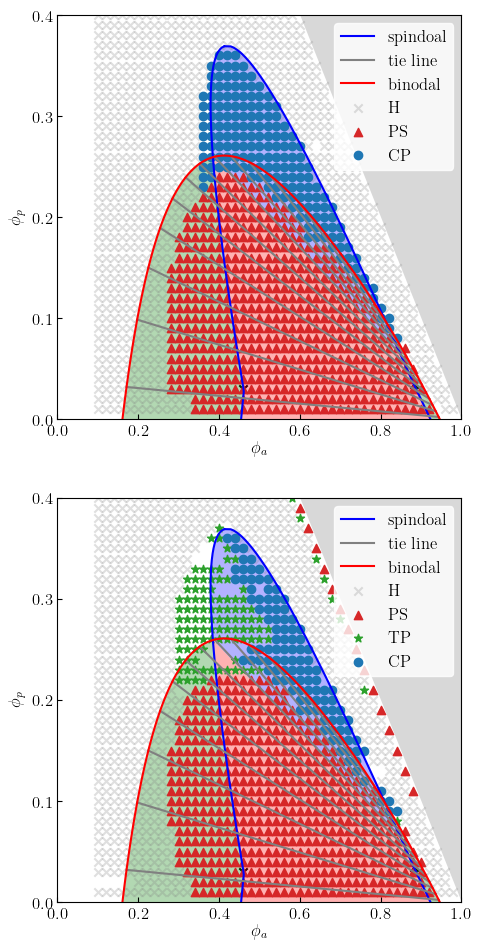

Any[91, 92, 93, 94, 95, 545, 583, 584, 585, 622, 835, 856, 857, 909, 962, 963, 964, 965, 996, 997, 998, 999, 1000, 1186, 1187, 1188, 1191, 1246, 1271, 1272, 1273, 1274, 1300, 1301, 1302, 1358]

In [205]:
function tp_param(i)
    DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ = (1.0, 7.5, 1.0, 100, 0.05, 25.0, 0.5, 0.1,0.1,1e-5, 0.1);
    ϕa,ϕp = [(x,y) for x in 0.1:0.02:1.0, y in 0.0:0.01:0.4 if x+y<1][i]
    T, save_interval, param_name, pert = (2000.0, 10.0, "tp_experiment", "single")
    param = new_param(DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true, pert= pert)
    return param
end
function tp_param_coord(ϕa,ϕp)
    DT, v0, DR, N, Δx, Lx, Ly, _, _, δt, δ = (1.0, 7.5, 1.0, 100, 0.05, 25.0, 0.5, 0.1,0.1,1e-5, 0.1);
    T, save_interval, param_name, pert = (2000.0, 10.0, "tp_experiment", "single")
    param = new_param(DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true, pert= pert)
    return param
end
# plot cp
# using PyPlot, LaTeXStrings
# fig, ax = subplots(1,1,figsize=(5,5))
ax = axs[2]
v0 = 7.5
plot_phase(fig, ax, v0, 12; Lxs = [], Δϕ = 0.001)
ϵ1 = 5e-2
ϵ2 = 2e-3
ϵ3 = 9e-1
ϵ4 = 1e-5
ϵ5 = 5e-3
N = 1445 # 1445
homog = [tp_param_coord(0.28, 0.05)] # load error 
mips = []
cps = [tp_param_coord(0.62, 0.19)] # num peaks > 2 
tps = []
missing_i = []
tp_pts = Dict{String, Any}()
for i in 46:1:N
    param = tp_param(i)
    @unpack ϕa, ϕp = param
    if param in homog
        ax.scatter(ϕa, ϕp; marker = "x", label = "_homog", color = "grey", alpha = 0.25)
    elseif param in mips
        ax.scatter(ϕa, ϕp; marker = "^", label = "_PS", color = "tab:red")
    elseif param in cps
        ax.scatter(ϕa, ϕp; marker = "o", label = "_DS", color = "tab:blue")
    elseif param in tps
        ax.scatter(ϕa, ϕp; marker = "*", label = "_TPS", color = "purple")
    elseif "$(i)" in keys(tp_pts)
        if tp_pts["$(i)"] == "H"
            ax.scatter(ϕa, ϕp; marker = "x", label = "_homog", color = "grey", alpha = 0.25)
        elseif tp_pts["$(i)"] == "PS"
            ax.scatter(ϕa, ϕp; marker = "^", label = "_PS", color = "tab:red")
        elseif tp_pts["$(i)"] == "CP"
            ax.scatter(ϕa, ϕp; marker = "o", label = "_CP", color = "tab:blue")
        elseif tp_pts["$(i)"] == "TP"
            ax.scatter(ϕa, ϕp; marker = "*", label = "_TP", color = "tab:purple")
        end
    else
        try
            param = tp_param(i)
            ts,fs = silent_load_compress_pde(param)
            normf, c, dc = f_dots(param, fs[end:-1:(end-10)])
            _, _, dc = f_dots(param, fs[end:-1:(end-50)])
            dm = mdiffs(fs)
            @unpack ϕa, ϕp = param
            if (normf < ϵ1)
                tp_pts["$(i)"] = "H"
                ax.scatter(ϕa, ϕp; marker = "x", label = "_homog", color = "grey", alpha = 0.25)
            elseif (c < ϵ2)&&(ts[end]>700)
                tp_pts["$(i)"] = "PS"
                ax.scatter(ϕa, ϕp; marker = "^", label = "_PS", color = "tab:red")
            # elseif (dm > ϵ3)&&(ts[end]>700)
            #     tp_pts["$(i)"] = "TP"
            #     ax.scatter(ϕa, ϕp; marker = "*", label = "_TP", color = "tab:purple")
            elseif (dc < ϵ4)&&(ts[end]>700)
                tp_pts["$(i)"] = "TP"
                ax.scatter(ϕa, ϕp; marker = "*", label = "_TP", color = "tab:green")
            elseif (c > ϵ5)&&(ts[end]>990)
                tp_pts["$(i)"] = "CP"
                ax.scatter(ϕa, ϕp; marker = "o", label = "_CP", color = "tab:blue")
            else
                push!(missing_i, i)
            end
        catch 
            push!(missing_i, i)
        end
    end
end
ax.scatter(-1, -1; marker = "x", label = L"\mathrm{H}", color = "grey", alpha = 0.25)
ax.scatter(-1, -1; marker = "^", label = L"\mathrm{PS}", color = "tab:red")
ax.scatter(-1, -1; marker = "*", label = L"\mathrm{TP}", color = "tab:green")
ax.scatter(-1, -1; marker = "o", label = L"\mathrm{CP}", color = "tab:blue")
ax.legend(edgecolor = "white", fontsize=12)
display(fig)
print(missing_i)

In [10]:
Pe = 7.5
file_name = "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/tp_pts/Pe=$(Pe).jld2"
data = Dict{String,Any}()
@pack! data = tp_pts
safesave(file_name,data)

In [207]:
using SciPy

function add_TP(fig,ax; Pe = 7.5)
    Pe = 7.5
    file_name = "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/TP/Pe=$(Pe).jld2"
    data = load(file_name)
    @unpack outline = data

    left_out = [x.+[-0.005,0.005] for x in sort(outline[1:20]; by= x->x[2])];
    top_out = [[0.41,0.37],[0.42,0.37],[0.43,0.37],[0.44,0.37],[0.45,0.37]];
    right_out = [x.+[0.005, 0.005] for x in sort(outline[78:end]; by= x->x[1])];
    bottom_out = [x.- [0.00, 0.005] for x in sort(outline[21:77]; by= x->x[1], rev = true)];

    X = hcat(left_out...,top_out...,right_out...,bottom_out...,left_out[1])
    #create spline function
    f, u = SciPy.interpolate.splprep(X, s=0.001, per=true)
    #create interpolated lists of points
    xint, yint = SciPy.interpolate.splev( 0.:.001:1.,f)

    ax.plot(xint, yint; color = "purple", linestyle = "--", label = "TP")

    min_x = minimum(xint)
    max_x = maximum(xint)

    dx = (max_x-min_x)/500
    xs = min_x:dx:max_x

    g(t) = SciPy.interpolate.splev(t,f)[1][1]
    ts = hcat([find_zeros(y->(g(y)-x),(0,1)) for x in xs]...)

    h(t) = SciPy.interpolate.splev(t,f)[2][1]
    ax.fill_between(xs,h.(ts[1,:]),h.(ts[2,:]), color = "purple", alpha = 0.3, linewidth = 0)
    ax.legend()
    return fig,ax
end

add_TP(fig,ax; Pe = 7.5)
# display(fig)

(Figure(PyObject <Figure size 500x1000 with 2 Axes>), PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f1d8162ebe0>)

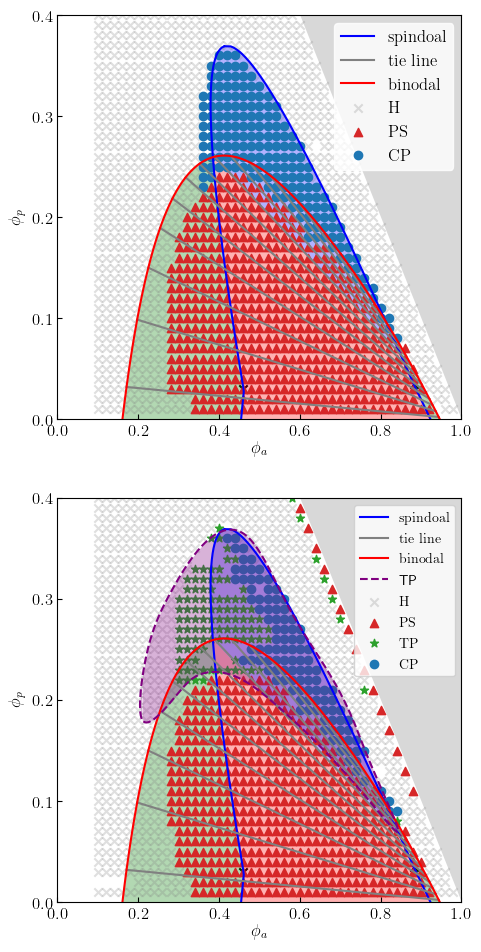

In [208]:
display(fig)

In [22]:
fig_name = "TP_phases"
# @unpack v0, Lx, Δx = param
pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_phase/$(fig_name)";
mkpath(pathname)
filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_phase/$(fig_name)/Pe=$(v0)_draft_1.pdf";
PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)

# display(fig)

In [21]:
# axs[1].set_title(L"\mathrm{Pe}=7.5")
axs[1].legend(fontsize = 12, edgecolor = "white")
axs[2].legend(fontsize = 12, edgecolor = "white")

PyObject <matplotlib.legend.Legend object at 0x7f22cdb5aac0>

In [53]:
input = 4
ϕa, ϕp = [(0.28,0.02), (0.28,0.03),(0.30,0.01), (0.3,0.02), (0.3,0.03), (0.32,0.02), (0.32,0.03), (0.34,0.02), (0.34,0.03), (0.36,0.02)][input]
param = tp_param_coord(ϕa, ϕp);

In [74]:
[(x,y) for x in 0.2:0.02:0.4, y in 0.01:0.01:0.07][77]

(0.4, 0.07)

In [68]:
# i = 1074
# param = cp_param(i)
@unpack DT, v0, DR, Δx, Lx, ϕa, ϕp, T , name, Nx, save_interval, save_on, δt = param
# configuration
f = initiate_uniform_pde(ϕa, ϕp, Nx);
f = perturb_pde!(f, param);
maximum(sum(f;dims = 2)),minimum(f[:,3]),minimum(f[:,1]+f[:,2])


max pert


(0.48693881478467016, 1.0000000001675335e-8, 0.15306117521532983)

In [57]:
f = saftey_f(f);

In [58]:
maximum(sum(f;dims = 2)),minimum(f[:,3]),minimum(f[:,1]+f[:,2])

(0.5628242582679769, 0.0, 0.1530611767459416)

In [33]:
dist_from_unif(f, param)

0.1

In [215]:
# function cp_param_coord(ϕa,ϕp)
#     DT, v0, DR, N, Δx, Lx, Ly, _, _, δt, δ = (1.0, 7.5, 1.0, 100, 0.05, 25.0, 0.5, 0.1,0.1,1e-5, 0.1);
#     T, save_interval, param_name, pert = (2000.0, 10.0, "cp_experiment", "double")
#     param = new_param(DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true, pert= pert)
#     return param
# end
# param = cp_param_coord(0.30, 0.04)# remove phi > 0.95
param = tp_param_coord(0.4, 0.24);
# param = cp_param(88)
# param = tp_param(91)
ts,fs = silent_load_compress_pde(param)
normf, c, dc = f_dots(param, fs[end:-1:(end-20)]) # normf 0.05? c 0.001?  
dm = mdiffs(fs) # 0.05?
@unpack ϕa, ϕp = param
println(ϕa," ",ϕp)
println((normf, c, dm, ts[end],dc))
println((normf< ϵ1),(c < ϵ2)&&(ts[end]>700),(dc < ϵ4)&&(ts[end]>700), (c > ϵ5)&&(ts[end]>990))


0.4 0.24
(0.14943428957781824, 0.037167762983595046, 0.870717848200793, 790.000008721838, 7.873946807068766e-7)
falsefalsetruefalse


In [164]:
param = tp_param(283)
@unpack ϕa, ϕp = param
ϕa, ϕp

(0.46, 0.06)

In [135]:
frame = 95
normf, c, _ = f_dot(param, fs[1])
print((normf, c, dc, ts[1]))

(0.10000000000000002, 0.5803410813405934, 0.0017695902281011922, 0.0)

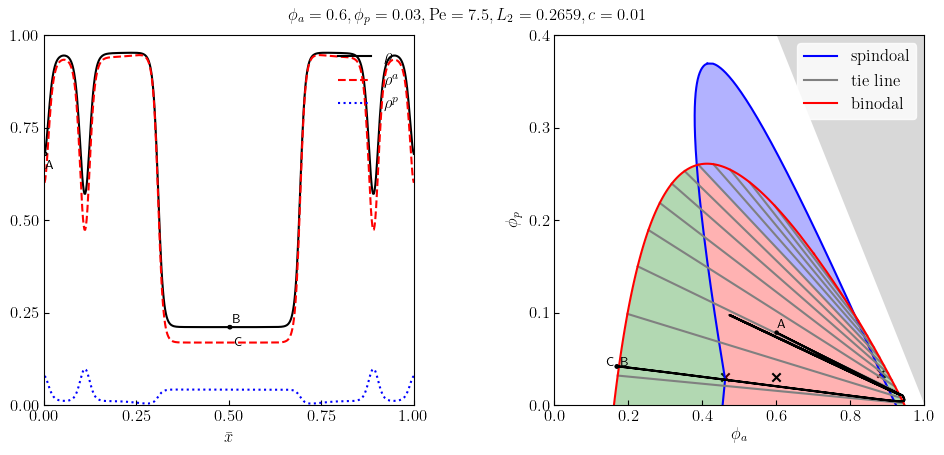

In [166]:
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
f = fs[1]
show_f(axs,fig,12,param,f; c=c, Δϕ = 0.001)

full load
saved


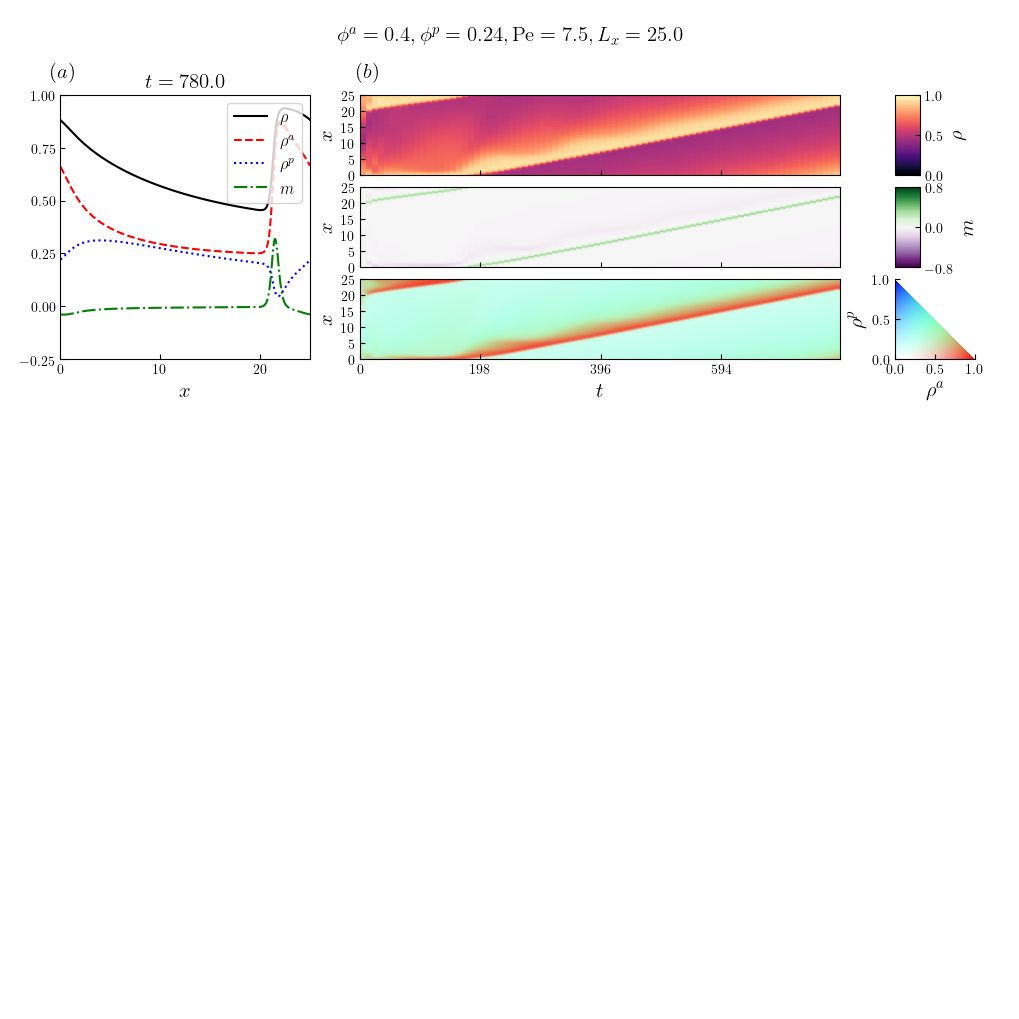

In [214]:
@unpack Nx, Δx = param
using KernelDensitySJ, Peaks

#load saves
ts, f_saves = load_compress_pde(param);
#process
    ft      = permutedims(reshape(reduce(hcat,f_saves),(Nx,3,:)),(3,1,2))
    # ft      = ft[t_start:1:t_end, : ,: ]
    # ts      = ts[t_start:1:end]
    pk      = find_xpeak_ft(ts , ft; time_length = 0.1)
    centre  = Nx ÷ 2 + 1 
    ft  = circshift(ft, (0,-pk, 0));

    t_pde_rgb_image = rho_to_rgb(ft);
    dt, df = t_dff(ts , ft; N=Nx);

    fts = [ft]
    times = [ts]
    images = [t_pde_rgb_image]
    dts = [dt]
    dfs = [df];

t_max = maximum(ts)
@unpack Lx = param
    rhomax  = 1.0
    rhomin  = 0.0
    mag_lim = 0.8
    height_1 = 0.08
    width_1  = 0.48 #2*0.365
    side_gap_1  = 0.35
    bottom_gap_1  = 0.65
    gap = 0.012

    cbar_y_top = bottom_gap_1 + 3*height_1 + 2*gap
    cbar_width = 0.1
    cbar_y_bot = bottom_gap_1+ gap+ height_1#bottom_gap_1 + cbar_width + 0.02
    cbar_x = 0.885 #1- cbar_width#2*width_1+ 3*side_gap_1


    height_2 = 0.175
    width_2  = height_2
    side_gap_2  = 0.1
    bottom_gap_2  = bottom_gap_1
    gap_2 = 0.06

    t_stamp_x = 0.03
    t_stamp_y = 0.05

    width_3 = 0.25
    start_3 = 0.05

    font = 15

    sf = 1.0
#create plot
    using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig = plt.figure(figsize=(10,Int64(10*sf)))
    ax = fig.add_axes([0,0,1,1],visible=true)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.spines["bottom"].set_visible(false)
    ax.spines["left"].set_visible(false)
    # ax = fig.add_axes([0.775,0,0.225,1],visible=true)
    # ax.xaxis.set_ticks([])
    # ax.yaxis.set_ticks([])
    # ax = fig.add_axes([0.025,0.5,0.95,0.45],visible=true)
    # ax.xaxis.set_ticks([])
    # ax.yaxis.set_ticks([])
# add image
    for (i,(rgb_image,ts)) in enumerate(zip(images, times))
        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1), bottom_gap_1, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]
        t_max = t_end -t_start
        ax.imshow(rgb_image; extent = [t_start,t_end,0,Lx], interpolation = "bilinear")
        #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        ax.get_yaxis().set_ticks(0:5:Lx)
        # ax.set_yticklabels(["0","10","20"])
        ax.get_xaxis().set_ticks([])
        ax.axis([0,t_max, 0, Lx])
        ax.set_aspect((t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = font, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.set_xlabel(L"t", fontsize = font)
        ax.tick_params(labelbottom = true, direction = "in")
    end
# add mats
    for (i,(ts,ft)) in enumerate(zip(times, fts))
        global im1, im2
        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1), bottom_gap_1+2*height_1+2*gap, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]
        t_max = t_end -t_start
        _, Nx, _ = size(ft)

        colmap = PyPlot.plt.cm.magma
        norm1 = matplotlib.colors.Normalize(vmin= rhomin, vmax= rhomax) 
        im1 = ax.matshow((ft[:,Nx:-1:1,1]+ft[:,Nx:-1:1,2]+ft[:,Nx:-1:1,3])'; norm = norm1,  cmap = colmap, extent = [t_start,t_end,0,Lx])

        #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        ax.xaxis.set_ticks([])
        ax.xaxis.tick_bottom()
        ax.get_yaxis().set_ticks(0:5:Lx)
        # ax.set_yticklabels(["0","10","20"])
        ax.axis([0,t_max, 0, Lx])
        ax.set_aspect((t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = font, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.tick_params(labelbottom = false, direction = "in")

        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1),bottom_gap_1+height_1+gap, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]

        colmap = PyPlot.plt.cm.PRGn
        norm1 = matplotlib.colors.Normalize(vmin= -mag_lim, vmax= mag_lim) 
        im2 = ax.matshow((ft[:,Nx:-1:1,2]-ft[:,Nx:-1:1,1])'; norm = norm1,  cmap = colmap, extent = [t_start,t_end,0,Lx])
        
        ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        # ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks(0:5:Lx)
        # ax.set_yticklabels(["0","10","20"])
        ax.xaxis.tick_bottom()
        ax.axis([0,t_max, 0, Lx])
        ax.set_aspect((t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = font, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.tick_params(labelbottom = false, direction = "in")
    end
# add tdiff
    #     for (i,(ts, df)) in enumerate(zip(dts, dfs))
    #         ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1),bottom_gap_1-height_1-gap, width_1, height_1])
    #         t_end = ts[end]
    #         t_start = ts[1]
    #         t_max = t_end -t_start
    #         ax.plot(ts[2:end], df[2:end]; color = "black")
    #         # if i ==1
    #         #     smooth_df = KernelDensitySJ.smooth(ts[2:end],df[2:end],0.2, ts[2:end])
    #         #     ax.plot(ts[2:end], smooth_df; color = "black")
    #         # else
    #         #     ax.plot(ts[2:end], df[2:end]; color = "black")
    #         # end
    #         #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
            
    #         #ax.get_xaxis().set_ticks([])
    #         ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
    #         ax.get_yaxis().set_ticks(0:0.04:0.04)
    #         ax.axis([t_start,t_end, 0, 0.04])
    #         ax.set_aspect((t_max/0.04)*(height_1/width_1)*sf)
    #         ax.set_ylabel(L"\Vert \dot f \Vert_2",fontsize = 15, rotation = 90)
    #         ax.set_xlabel(L"t", fontsize = font)
    #         ax.tick_params(labelbottom = true, direction = "in")
    # end
# add end plot  
    frame = length(ts)-1
    ax = fig.add_axes([start_3, bottom_gap_2, width_3, 3*height_1+2*gap])
    ax.plot(Δx:Δx:Lx, ft[frame,:,2]+ft[frame,:,1]+ft[frame,:,3];
    color = "black", linestyle = "-", label = L"\rho")
    ax.plot(Δx:Δx:Lx, ft[frame,:,1]+ft[frame,:,2]; 
    color = "red", linestyle = "--", label = L"\rho^a")
    ax.plot(Δx:Δx:Lx, ft[frame,:,3]; 
    color = "blue", linestyle = ":",label = L"\rho^p")
    ax.plot(Δx:Δx:Lx, ft[frame,:,2]-ft[frame,:,1]; 
    color = "green", linestyle = "-.", label = L"m")
    

    latex_string = latexstring("\$ t = $(d2(ts[frame]))\$")
    ax.set_title(latex_string, fontsize = font)
    ax.get_xaxis().set_ticks(0:10.0:Lx)
    ax.get_yaxis().set_ticks(-0.25:0.25:1.0)
    # ax.set_xlabel(L"x", fontsize = 15)
    #ax.set_ylabel(L"m",fontsize = font, rotation = 90)
    ax.set_aspect((3*height_1+2*gap)*(Lx/(1.25))/(width_3))
    ax.axis([0,Lx,-0.25,1.0])
    ax.tick_params(direction = "in")
    ax.legend(loc= "upper right", fontsize = 12)
    ax.set_xlabel(L"x", fontsize = 15)

# add colour bars
    # ap cbar
    # cbar_ax = fig.add_axes([cbar_x, bottom_gap_1, cbar_width, cbar_width])
    cbar_ax = fig.add_axes([cbar_x, bottom_gap_2, height_1, height_1])

    Δ = 0.001
    cbar_f = [ x*(x+y≤ 1)*(i != 3)/2 + y*(x+y≤ 1)*(i == 3) for x in Δ:Δ:1, y in Δ:Δ:1, i in 1:3 ]  
    rgb_image = rho_to_rgb(cbar_f );

    ax = cbar_ax
    ax.imshow(rgb_image; extent = [0,1,0,1])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.get_xaxis().set_ticks(0:0.5:1)
    ax.get_yaxis().set_ticks(0:0.5:1)
    ax.set_xlabel(L"\rho^a", fontsize = font)
    ax.set_ylabel(L"\rho^p",fontsize = font, rotation = 90)
    ax.tick_params(direction = "in")
    # rho cbar
    # rho_cbar_ax = fig.add_axes([0.9, cbar_y_bot, 0.025, (cbar_y_top-cbar_y_bot)])
    rho_cbar_ax = fig.add_axes([cbar_x, cbar_y_bot+gap+height_1, 0.025, height_1])
    rho_cbar = fig.colorbar(im1, cax=rho_cbar_ax)
    # rho_cbar_ax.set_title(L"\rho",fontsize=25)
    rho_cbar_ax.set_ylabel(L"\rho",fontsize=font,rotation = 90)
    rho_cbar.set_ticks( rhomin:0.5:rhomax)
    rho_cbar_ax.yaxis.set_ticks_position("right")
    rho_cbar_ax.tick_params(direction = "in")
    # mag cbar
    # mag_cbar_ax = fig.add_axes([0.935, cbar_y_bot, 0.025, (cbar_y_top-cbar_y_bot)])
    mag_cbar_ax = fig.add_axes([cbar_x, cbar_y_bot, 0.025, height_1])
    # mag_cbar_ax.set_title(L"{m}",fontsize=25) #mathbf{}
    mag_cbar = fig.colorbar(im2, cax=mag_cbar_ax)
    mag_cbar.set_ticks((-mag_lim):0.8:mag_lim)
    mag_cbar_ax.tick_params(direction = "in")
    mag_cbar_ax.yaxis.set_ticks_position("right")
    mag_cbar_ax.set_ylabel(L"m",fontsize=font,rotation = 90)
#
#title
    @unpack v0, ϕa, ϕp, Lx = param
    latex_title = latexstring("\$ \\phi^a = $(ϕa), \\phi^p = $(ϕp), \\mathrm{Pe} = $(v0), L_x = $(Lx)\$")
    fig.suptitle(latex_title,fontsize=font)
# labels
    #latex_annotation = latexstring("\$ t = $(round( times[1][end];digits = 1))\$")
    ax.annotate(L"(a)", (start_3, bottom_gap_2+3*height_1+2*gap+0.01), xycoords = "figure fraction", rotation = 0, fontsize = font )
    ax.annotate(L"(b)", (side_gap_1, bottom_gap_2+3*height_1+2*gap+0.01), xycoords = "figure fraction", rotation = 0, fontsize = font )
display(fig)
fig_name = "pde_plot"
     @unpack ϕa, ϕp, v0, Lx = param
     pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)";
     mkpath(pathname)
     filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)/ϕa=$(ϕa)_ϕp=$(ϕp)_v0=$(v0)_Lx=$(Lx).pdf";
     PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)


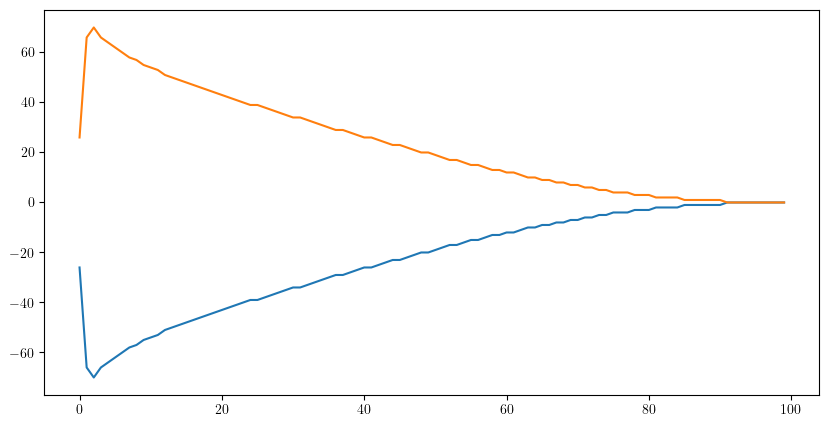

In [7]:
using PyPlot, LaTeXStrings
fig, ax = subplots(1,1,figsize=(10,5))
ax.plot([argmax(f[:,2]-f[:,1]) for f in fs].-argmax(fs[end][:,2]-fs[end][:,1]))
ax.plot([argmax(f[:,1]-f[:,2]) for f in fs].-argmax(fs[end][:,1]-fs[end][:,2]))
# ax.plot(argmax(fs[end][:,2]-fs[end][:,1])*ones(73))
display(fig)

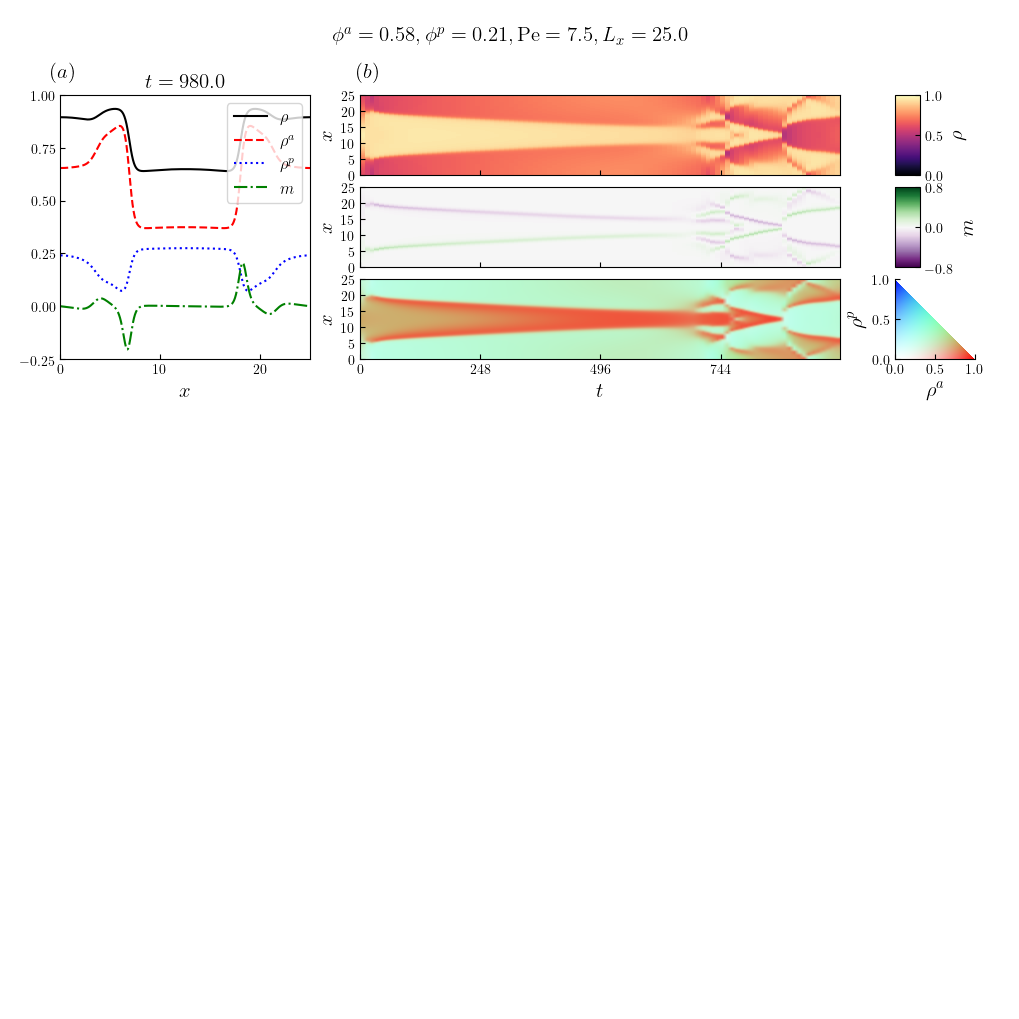

fast load


In [5]:
@unpack Nx, Δx = param
using KernelDensitySJ, Peaks

#load saves
# ts, f_saves = load_compress_pde(param);
#process
    ft      = permutedims(reshape(reduce(hcat,f_saves),(Nx,3,:)),(3,1,2))
    # ft      = ft[t_start:1:t_end, : ,: ]
    # ts      = ts[t_start:1:end]
    pk      = find_xpeak_ft(ts , ft; time_length = 0.1)
    centre  = Nx ÷ 2 + 1 
    ft  = circshift(ft, (0,-pk, 0));

    t_pde_rgb_image = rho_to_rgb(ft);
    dt, df = t_dff(ts , ft; N=Nx);

    fts = [ft]
    times = [ts]
    images = [t_pde_rgb_image]
    dts = [dt]
    dfs = [df];

t_max = maximum(ts)
@unpack Lx = param
    rhomax  = 1.0
    rhomin  = 0.0
    mag_lim = 0.8
    height_1 = 0.08
    width_1  = 0.48 #2*0.365
    side_gap_1  = 0.35
    bottom_gap_1  = 0.65
    gap = 0.012

    cbar_y_top = bottom_gap_1 + 3*height_1 + 2*gap
    cbar_width = 0.1
    cbar_y_bot = bottom_gap_1+ gap+ height_1#bottom_gap_1 + cbar_width + 0.02
    cbar_x = 0.885 #1- cbar_width#2*width_1+ 3*side_gap_1


    height_2 = 0.175
    width_2  = height_2
    side_gap_2  = 0.1
    bottom_gap_2  = bottom_gap_1
    gap_2 = 0.06

    t_stamp_x = 0.03
    t_stamp_y = 0.05

    width_3 = 0.25
    start_3 = 0.05

    font = 15

    sf = 1.0
#create plot
    using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig = plt.figure(figsize=(10,Int64(10*sf)))
    ax = fig.add_axes([0,0,1,1],visible=true)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.spines["bottom"].set_visible(false)
    ax.spines["left"].set_visible(false)
    # ax = fig.add_axes([0.775,0,0.225,1],visible=true)
    # ax.xaxis.set_ticks([])
    # ax.yaxis.set_ticks([])
    # ax = fig.add_axes([0.025,0.5,0.95,0.45],visible=true)
    # ax.xaxis.set_ticks([])
    # ax.yaxis.set_ticks([])
# add image
    for (i,(rgb_image,ts)) in enumerate(zip(images, times))
        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1), bottom_gap_1, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]
        t_max = t_end -t_start
        ax.imshow(rgb_image; extent = [t_start,t_end,0,Lx], interpolation = "bilinear")
        #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        ax.get_yaxis().set_ticks(0:5:Lx)
        # ax.set_yticklabels(["0","10","20"])
        ax.get_xaxis().set_ticks([])
        ax.axis([0,t_max, 0, Lx])
        ax.set_aspect((t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = font, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.set_xlabel(L"t", fontsize = font)
        ax.tick_params(labelbottom = true, direction = "in")
    end
# add mats
    for (i,(ts,ft)) in enumerate(zip(times, fts))
        global im1, im2
        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1), bottom_gap_1+2*height_1+2*gap, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]
        t_max = t_end -t_start
        _, Nx, _ = size(ft)

        colmap = PyPlot.plt.cm.magma
        norm1 = matplotlib.colors.Normalize(vmin= rhomin, vmax= rhomax) 
        im1 = ax.matshow((ft[:,Nx:-1:1,1]+ft[:,Nx:-1:1,2]+ft[:,Nx:-1:1,3])'; norm = norm1,  cmap = colmap, extent = [t_start,t_end,0,Lx])

        #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        ax.xaxis.set_ticks([])
        ax.xaxis.tick_bottom()
        ax.get_yaxis().set_ticks(0:5:Lx)
        # ax.set_yticklabels(["0","10","20"])
        ax.axis([0,t_max, 0, Lx])
        ax.set_aspect((t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = font, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.tick_params(labelbottom = false, direction = "in")

        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1),bottom_gap_1+height_1+gap, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]

        colmap = PyPlot.plt.cm.PRGn
        norm1 = matplotlib.colors.Normalize(vmin= -mag_lim, vmax= mag_lim) 
        im2 = ax.matshow((ft[:,Nx:-1:1,2]-ft[:,Nx:-1:1,1])'; norm = norm1,  cmap = colmap, extent = [t_start,t_end,0,Lx])
        
        ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        # ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks(0:5:Lx)
        # ax.set_yticklabels(["0","10","20"])
        ax.xaxis.tick_bottom()
        ax.axis([0,t_max, 0, Lx])
        ax.set_aspect((t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = font, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.tick_params(labelbottom = false, direction = "in")
    end
# add tdiff
    #     for (i,(ts, df)) in enumerate(zip(dts, dfs))
    #         ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1),bottom_gap_1-height_1-gap, width_1, height_1])
    #         t_end = ts[end]
    #         t_start = ts[1]
    #         t_max = t_end -t_start
    #         ax.plot(ts[2:end], df[2:end]; color = "black")
    #         # if i ==1
    #         #     smooth_df = KernelDensitySJ.smooth(ts[2:end],df[2:end],0.2, ts[2:end])
    #         #     ax.plot(ts[2:end], smooth_df; color = "black")
    #         # else
    #         #     ax.plot(ts[2:end], df[2:end]; color = "black")
    #         # end
    #         #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
            
    #         #ax.get_xaxis().set_ticks([])
    #         ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
    #         ax.get_yaxis().set_ticks(0:0.04:0.04)
    #         ax.axis([t_start,t_end, 0, 0.04])
    #         ax.set_aspect((t_max/0.04)*(height_1/width_1)*sf)
    #         ax.set_ylabel(L"\Vert \dot f \Vert_2",fontsize = 15, rotation = 90)
    #         ax.set_xlabel(L"t", fontsize = font)
    #         ax.tick_params(labelbottom = true, direction = "in")
    # end
# add end plot  
    frame = length(ts)-1
    ax = fig.add_axes([start_3, bottom_gap_2, width_3, 3*height_1+2*gap])
    ax.plot(Δx:Δx:Lx, ft[frame,:,2]+ft[frame,:,1]+ft[frame,:,3];
    color = "black", linestyle = "-", label = L"\rho")
    ax.plot(Δx:Δx:Lx, ft[frame,:,1]+ft[frame,:,2]; 
    color = "red", linestyle = "--", label = L"\rho^a")
    ax.plot(Δx:Δx:Lx, ft[frame,:,3]; 
    color = "blue", linestyle = ":",label = L"\rho^p")
    ax.plot(Δx:Δx:Lx, ft[frame,:,2]-ft[frame,:,1]; 
    color = "green", linestyle = "-.", label = L"m")
    

    latex_string = latexstring("\$ t = $(d2(ts[frame]))\$")
    ax.set_title(latex_string, fontsize = font)
    ax.get_xaxis().set_ticks(0:10.0:Lx)
    ax.get_yaxis().set_ticks(-0.25:0.25:1.0)
    # ax.set_xlabel(L"x", fontsize = 15)
    #ax.set_ylabel(L"m",fontsize = font, rotation = 90)
    ax.set_aspect((3*height_1+2*gap)*(Lx/(1.25))/(width_3))
    ax.axis([0,Lx,-0.25,1.0])
    ax.tick_params(direction = "in")
    ax.legend(loc= "upper right", fontsize = 12)
    ax.set_xlabel(L"x", fontsize = 15)

# add colour bars
    # ap cbar
    # cbar_ax = fig.add_axes([cbar_x, bottom_gap_1, cbar_width, cbar_width])
    cbar_ax = fig.add_axes([cbar_x, bottom_gap_2, height_1, height_1])

    Δ = 0.001
    cbar_f = [ x*(x+y≤ 1)*(i != 3)/2 + y*(x+y≤ 1)*(i == 3) for x in Δ:Δ:1, y in Δ:Δ:1, i in 1:3 ]  
    rgb_image = rho_to_rgb(cbar_f );

    ax = cbar_ax
    ax.imshow(rgb_image; extent = [0,1,0,1])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.get_xaxis().set_ticks(0:0.5:1)
    ax.get_yaxis().set_ticks(0:0.5:1)
    ax.set_xlabel(L"\rho^a", fontsize = font)
    ax.set_ylabel(L"\rho^p",fontsize = font, rotation = 90)
    ax.tick_params(direction = "in")
    # rho cbar
    # rho_cbar_ax = fig.add_axes([0.9, cbar_y_bot, 0.025, (cbar_y_top-cbar_y_bot)])
    rho_cbar_ax = fig.add_axes([cbar_x, cbar_y_bot+gap+height_1, 0.025, height_1])
    rho_cbar = fig.colorbar(im1, cax=rho_cbar_ax)
    # rho_cbar_ax.set_title(L"\rho",fontsize=25)
    rho_cbar_ax.set_ylabel(L"\rho",fontsize=font,rotation = 90)
    rho_cbar.set_ticks( rhomin:0.5:rhomax)
    rho_cbar_ax.yaxis.set_ticks_position("right")
    rho_cbar_ax.tick_params(direction = "in")
    # mag cbar
    # mag_cbar_ax = fig.add_axes([0.935, cbar_y_bot, 0.025, (cbar_y_top-cbar_y_bot)])
    mag_cbar_ax = fig.add_axes([cbar_x, cbar_y_bot, 0.025, height_1])
    # mag_cbar_ax.set_title(L"{m}",fontsize=25) #mathbf{}
    mag_cbar = fig.colorbar(im2, cax=mag_cbar_ax)
    mag_cbar.set_ticks((-mag_lim):0.8:mag_lim)
    mag_cbar_ax.tick_params(direction = "in")
    mag_cbar_ax.yaxis.set_ticks_position("right")
    mag_cbar_ax.set_ylabel(L"m",fontsize=font,rotation = 90)
#
#title
    @unpack v0, ϕa, ϕp, Lx = param
    latex_title = latexstring("\$ \\phi^a = $(ϕa), \\phi^p = $(ϕp), \\mathrm{Pe} = $(v0), L_x = $(Lx)\$")
    fig.suptitle(latex_title,fontsize=font)
# labels
    #latex_annotation = latexstring("\$ t = $(round( times[1][end];digits = 1))\$")
    ax.annotate(L"(a)", (start_3, bottom_gap_2+3*height_1+2*gap+0.01), xycoords = "figure fraction", rotation = 0, fontsize = font )
    ax.annotate(L"(b)", (side_gap_1, bottom_gap_2+3*height_1+2*gap+0.01), xycoords = "figure fraction", rotation = 0, fontsize = font )
display(fig)
fig_name = "pde_plot"
     @unpack ϕa, ϕp, v0, Lx = param
     pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)";
     mkpath(pathname)
     filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)/ϕa=$(ϕa)_ϕp=$(ϕp)_v0=$(v0)_Lx=$(Lx).pdf";
     PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)


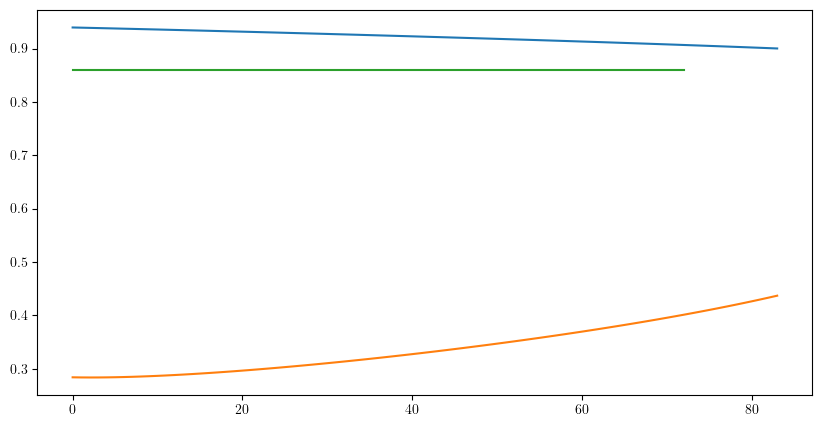

In [71]:
using PyPlot, LaTeXStrings
fig, ax = subplots(1,1,figsize=(10,5))
ax.plot([maximum(f[:,1]+f[:,2]) for f in fs])
ax.plot([minimum(f[:,1]+f[:,2]) for f in fs])
ax.plot(ϕa*ones(73))
display(fig)

full load
saved


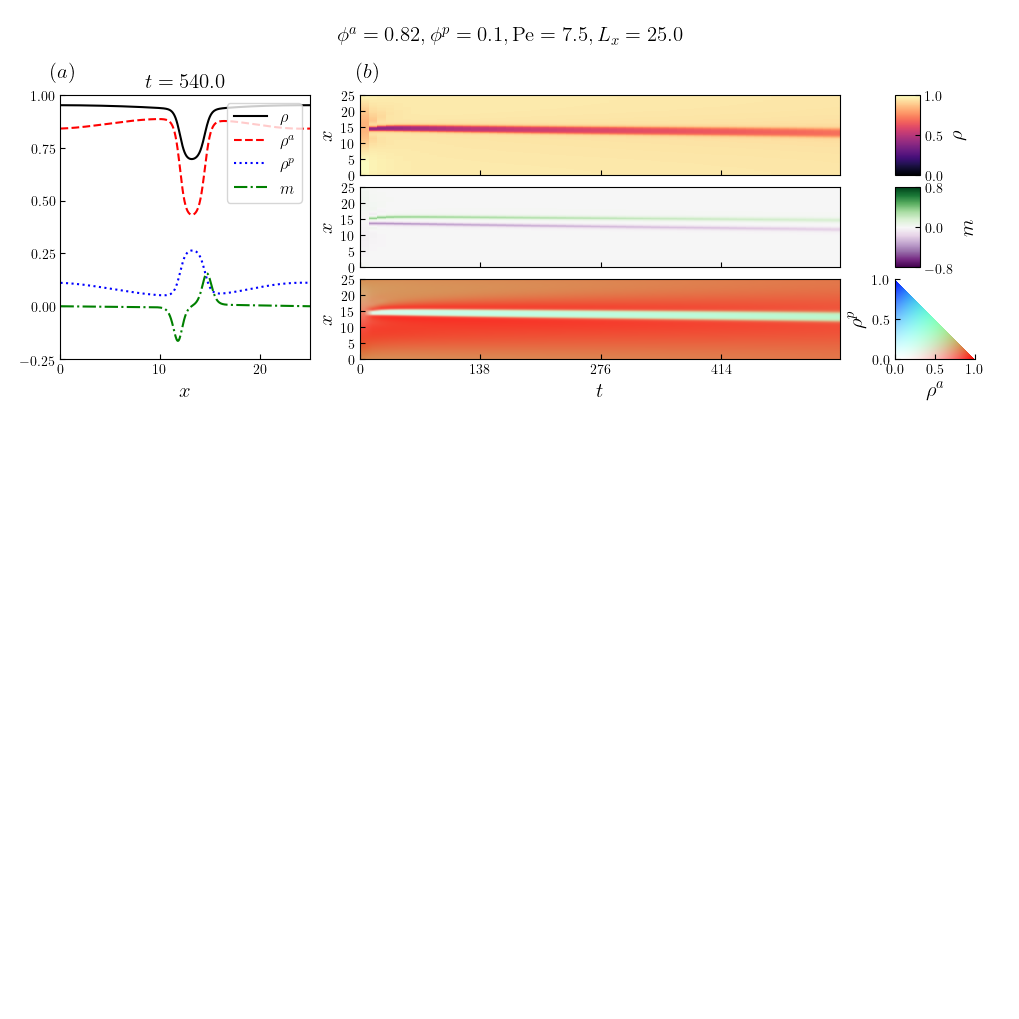

In [17]:
ϕa, ϕp = 0.82, 0.1
param = tp_param_coord(ϕa, ϕp);

@unpack Nx, Δx = param
using KernelDensitySJ, Peaks

#load saves
ts, f_saves = load_compress_pde(param);
#process
    ft      = permutedims(reshape(reduce(hcat,f_saves),(Nx,3,:)),(3,1,2))
    # ft      = ft[t_start:1:t_end, : ,: ]
    # ts      = ts[t_start:1:end]
    pk      = find_xpeak_ft(ts , ft; time_length = 0.1)
    centre  = Nx ÷ 2 + 1 
    ft  = circshift(ft, (0,-pk, 0));

    t_pde_rgb_image = rho_to_rgb(ft);
    dt, df = t_dff(ts , ft; N=Nx);

    fts = [ft]
    times = [ts]
    images = [t_pde_rgb_image]
    dts = [dt]
    dfs = [df];

t_max = maximum(ts)
@unpack Lx = param
    rhomax  = 1.0
    rhomin  = 0.0
    mag_lim = 0.8
    height_1 = 0.08
    width_1  = 0.48 #2*0.365
    side_gap_1  = 0.35
    bottom_gap_1  = 0.65
    gap = 0.012

    cbar_y_top = bottom_gap_1 + 3*height_1 + 2*gap
    cbar_width = 0.1
    cbar_y_bot = bottom_gap_1+ gap+ height_1#bottom_gap_1 + cbar_width + 0.02
    cbar_x = 0.885 #1- cbar_width#2*width_1+ 3*side_gap_1


    height_2 = 0.175
    width_2  = height_2
    side_gap_2  = 0.1
    bottom_gap_2  = bottom_gap_1
    gap_2 = 0.06

    t_stamp_x = 0.03
    t_stamp_y = 0.05

    width_3 = 0.25
    start_3 = 0.05

    font = 15

    sf = 1.0
#create plot
    using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig = plt.figure(figsize=(10,Int64(10*sf)))
    ax = fig.add_axes([0,0,1,1],visible=true)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.spines["bottom"].set_visible(false)
    ax.spines["left"].set_visible(false)
    # ax = fig.add_axes([0.775,0,0.225,1],visible=true)
    # ax.xaxis.set_ticks([])
    # ax.yaxis.set_ticks([])
    # ax = fig.add_axes([0.025,0.5,0.95,0.45],visible=true)
    # ax.xaxis.set_ticks([])
    # ax.yaxis.set_ticks([])
# add image
    for (i,(rgb_image,ts)) in enumerate(zip(images, times))
        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1), bottom_gap_1, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]
        t_max = t_end -t_start
        ax.imshow(rgb_image; extent = [t_start,t_end,0,Lx], interpolation = "bilinear")
        #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        ax.get_yaxis().set_ticks(0:5:Lx)
        # ax.set_yticklabels(["0","10","20"])
        ax.get_xaxis().set_ticks([])
        ax.axis([0,t_max, 0, Lx])
        ax.set_aspect((t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = font, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.set_xlabel(L"t", fontsize = font)
        ax.tick_params(labelbottom = true, direction = "in")
    end
# add mats
    for (i,(ts,ft)) in enumerate(zip(times, fts))
        global im1, im2
        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1), bottom_gap_1+2*height_1+2*gap, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]
        t_max = t_end -t_start
        _, Nx, _ = size(ft)

        colmap = PyPlot.plt.cm.magma
        norm1 = matplotlib.colors.Normalize(vmin= rhomin, vmax= rhomax) 
        im1 = ax.matshow((ft[:,Nx:-1:1,1]+ft[:,Nx:-1:1,2]+ft[:,Nx:-1:1,3])'; norm = norm1,  cmap = colmap, extent = [t_start,t_end,0,Lx])

        #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        ax.xaxis.set_ticks([])
        ax.xaxis.tick_bottom()
        ax.get_yaxis().set_ticks(0:5:Lx)
        # ax.set_yticklabels(["0","10","20"])
        ax.axis([0,t_max, 0, Lx])
        ax.set_aspect((t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = font, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.tick_params(labelbottom = false, direction = "in")

        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1),bottom_gap_1+height_1+gap, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]

        colmap = PyPlot.plt.cm.PRGn
        norm1 = matplotlib.colors.Normalize(vmin= -mag_lim, vmax= mag_lim) 
        im2 = ax.matshow((ft[:,Nx:-1:1,2]-ft[:,Nx:-1:1,1])'; norm = norm1,  cmap = colmap, extent = [t_start,t_end,0,Lx])
        
        ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        # ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks(0:5:Lx)
        # ax.set_yticklabels(["0","10","20"])
        ax.xaxis.tick_bottom()
        ax.axis([0,t_max, 0, Lx])
        ax.set_aspect((t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = font, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.tick_params(labelbottom = false, direction = "in")
    end
# add tdiff
    #     for (i,(ts, df)) in enumerate(zip(dts, dfs))
    #         ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1),bottom_gap_1-height_1-gap, width_1, height_1])
    #         t_end = ts[end]
    #         t_start = ts[1]
    #         t_max = t_end -t_start
    #         ax.plot(ts[2:end], df[2:end]; color = "black")
    #         # if i ==1
    #         #     smooth_df = KernelDensitySJ.smooth(ts[2:end],df[2:end],0.2, ts[2:end])
    #         #     ax.plot(ts[2:end], smooth_df; color = "black")
    #         # else
    #         #     ax.plot(ts[2:end], df[2:end]; color = "black")
    #         # end
    #         #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
            
    #         #ax.get_xaxis().set_ticks([])
    #         ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
    #         ax.get_yaxis().set_ticks(0:0.04:0.04)
    #         ax.axis([t_start,t_end, 0, 0.04])
    #         ax.set_aspect((t_max/0.04)*(height_1/width_1)*sf)
    #         ax.set_ylabel(L"\Vert \dot f \Vert_2",fontsize = 15, rotation = 90)
    #         ax.set_xlabel(L"t", fontsize = font)
    #         ax.tick_params(labelbottom = true, direction = "in")
    # end
# add end plot  
    frame = length(ts)-1
    ax = fig.add_axes([start_3, bottom_gap_2, width_3, 3*height_1+2*gap])
    ax.plot(Δx:Δx:Lx, ft[frame,:,2]+ft[frame,:,1]+ft[frame,:,3];
    color = "black", linestyle = "-", label = L"\rho")
    ax.plot(Δx:Δx:Lx, ft[frame,:,1]+ft[frame,:,2]; 
    color = "red", linestyle = "--", label = L"\rho^a")
    ax.plot(Δx:Δx:Lx, ft[frame,:,3]; 
    color = "blue", linestyle = ":",label = L"\rho^p")
    ax.plot(Δx:Δx:Lx, ft[frame,:,2]-ft[frame,:,1]; 
    color = "green", linestyle = "-.", label = L"m")
    

    latex_string = latexstring("\$ t = $(d2(ts[frame]))\$")
    ax.set_title(latex_string, fontsize = font)
    ax.get_xaxis().set_ticks(0:10.0:Lx)
    ax.get_yaxis().set_ticks(-0.25:0.25:1.0)
    # ax.set_xlabel(L"x", fontsize = 15)
    #ax.set_ylabel(L"m",fontsize = font, rotation = 90)
    ax.set_aspect((3*height_1+2*gap)*(Lx/(1.25))/(width_3))
    ax.axis([0,Lx,-0.25,1.0])
    ax.tick_params(direction = "in")
    ax.legend(loc= "upper right", fontsize = 12)
    ax.set_xlabel(L"x", fontsize = 15)

# add colour bars
    # ap cbar
    # cbar_ax = fig.add_axes([cbar_x, bottom_gap_1, cbar_width, cbar_width])
    cbar_ax = fig.add_axes([cbar_x, bottom_gap_2, height_1, height_1])

    Δ = 0.001
    cbar_f = [ x*(x+y≤ 1)*(i != 3)/2 + y*(x+y≤ 1)*(i == 3) for x in Δ:Δ:1, y in Δ:Δ:1, i in 1:3 ]  
    rgb_image = rho_to_rgb(cbar_f );

    ax = cbar_ax
    ax.imshow(rgb_image; extent = [0,1,0,1])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.get_xaxis().set_ticks(0:0.5:1)
    ax.get_yaxis().set_ticks(0:0.5:1)
    ax.set_xlabel(L"\rho^a", fontsize = font)
    ax.set_ylabel(L"\rho^p",fontsize = font, rotation = 90)
    ax.tick_params(direction = "in")
    # rho cbar
    # rho_cbar_ax = fig.add_axes([0.9, cbar_y_bot, 0.025, (cbar_y_top-cbar_y_bot)])
    rho_cbar_ax = fig.add_axes([cbar_x, cbar_y_bot+gap+height_1, 0.025, height_1])
    rho_cbar = fig.colorbar(im1, cax=rho_cbar_ax)
    # rho_cbar_ax.set_title(L"\rho",fontsize=25)
    rho_cbar_ax.set_ylabel(L"\rho",fontsize=font,rotation = 90)
    rho_cbar.set_ticks( rhomin:0.5:rhomax)
    rho_cbar_ax.yaxis.set_ticks_position("right")
    rho_cbar_ax.tick_params(direction = "in")
    # mag cbar
    # mag_cbar_ax = fig.add_axes([0.935, cbar_y_bot, 0.025, (cbar_y_top-cbar_y_bot)])
    mag_cbar_ax = fig.add_axes([cbar_x, cbar_y_bot, 0.025, height_1])
    # mag_cbar_ax.set_title(L"{m}",fontsize=25) #mathbf{}
    mag_cbar = fig.colorbar(im2, cax=mag_cbar_ax)
    mag_cbar.set_ticks((-mag_lim):0.8:mag_lim)
    mag_cbar_ax.tick_params(direction = "in")
    mag_cbar_ax.yaxis.set_ticks_position("right")
    mag_cbar_ax.set_ylabel(L"m",fontsize=font,rotation = 90)
#
#title
    @unpack v0, ϕa, ϕp, Lx = param
    latex_title = latexstring("\$ \\phi^a = $(ϕa), \\phi^p = $(ϕp), \\mathrm{Pe} = $(v0), L_x = $(Lx)\$")
    fig.suptitle(latex_title,fontsize=font)
# labels
    #latex_annotation = latexstring("\$ t = $(round( times[1][end];digits = 1))\$")
    ax.annotate(L"(a)", (start_3, bottom_gap_2+3*height_1+2*gap+0.01), xycoords = "figure fraction", rotation = 0, fontsize = font )
    ax.annotate(L"(b)", (side_gap_1, bottom_gap_2+3*height_1+2*gap+0.01), xycoords = "figure fraction", rotation = 0, fontsize = font )
display(fig)
fig_name = "pde_plot"
     @unpack ϕa, ϕp, v0, Lx = param
     pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)";
     mkpath(pathname)
     filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)/ϕa=$(ϕa)_ϕp=$(ϕp)_v0=$(v0)_Lx=$(Lx).pdf";
     PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)


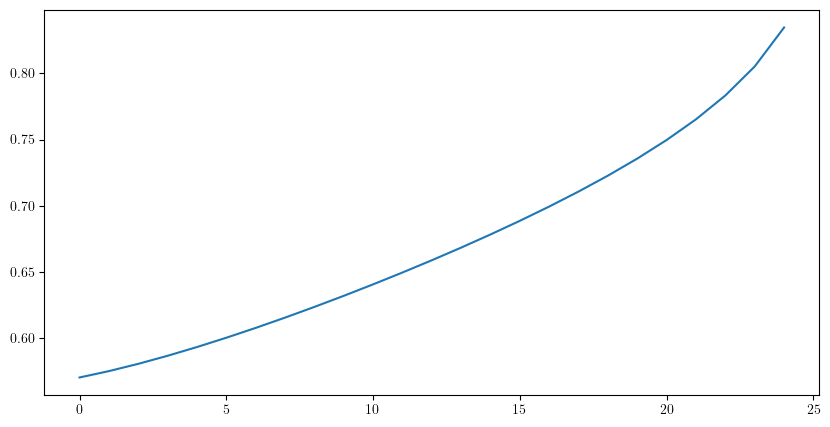

In [23]:
using PyPlot, LaTeXStrings
fig, ax = subplots(1,1,figsize=(10,5))
ax.plot([minimum(sum(f;dims =2)) for f in fs][20:2:69])
display(fig)

In [32]:
# param = cp_param(134)
ϕa, ϕp = 0.60, 0.2
param = cp_param_coord(ϕa, ϕp);
ts,fs = silent_load_compress_pde(param)
print(ts[end])
normf, c, _ = f_dots(param, fs[end:-1:(end-10)])

990.0000082168865

(0.1414846134941228, 0.09572570485138539, 0.003912573358876015)

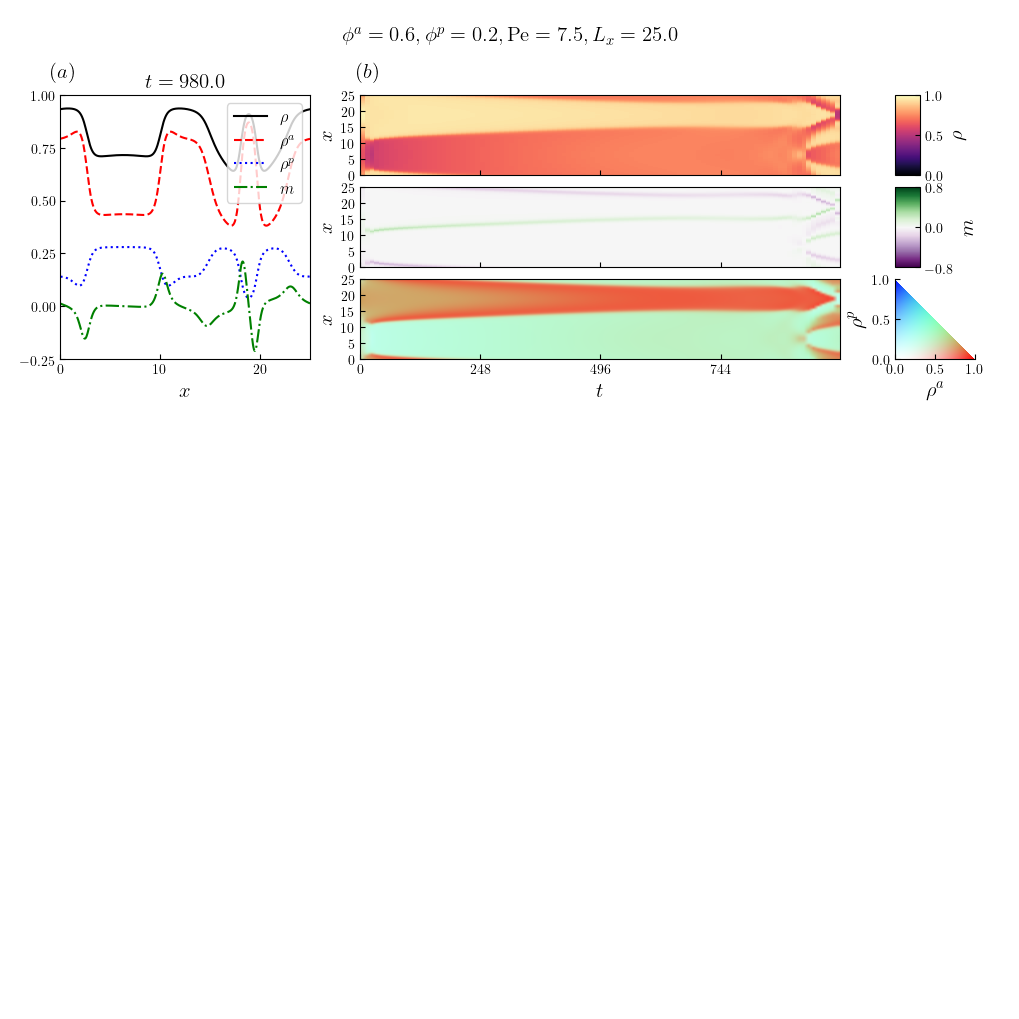

fast load


In [33]:
# param = cp_param(134)
ϕa, ϕp = 0.60, 0.2
param = cp_param_coord(ϕa, ϕp);

@unpack Nx, Δx = param
using KernelDensitySJ, Peaks

#load saves
ts, f_saves = load_compress_pde(param);
#process
    ft      = permutedims(reshape(reduce(hcat,f_saves),(Nx,3,:)),(3,1,2))
    # ft      = ft[t_start:1:t_end, : ,: ]
    # ts      = ts[t_start:1:end]
    pk      = find_xpeak_ft(ts , ft; time_length = 0.1)
    centre  = Nx ÷ 2 + 1 
    ft  = circshift(ft, (0,-pk, 0));

    t_pde_rgb_image = rho_to_rgb(ft);
    dt, df = t_dff(ts , ft; N=Nx);

    fts = [ft]
    times = [ts]
    images = [t_pde_rgb_image]
    dts = [dt]
    dfs = [df];

t_max = maximum(ts)
@unpack Lx = param
    rhomax  = 1.0
    rhomin  = 0.0
    mag_lim = 0.8
    height_1 = 0.08
    width_1  = 0.48 #2*0.365
    side_gap_1  = 0.35
    bottom_gap_1  = 0.65
    gap = 0.012

    cbar_y_top = bottom_gap_1 + 3*height_1 + 2*gap
    cbar_width = 0.1
    cbar_y_bot = bottom_gap_1+ gap+ height_1#bottom_gap_1 + cbar_width + 0.02
    cbar_x = 0.885 #1- cbar_width#2*width_1+ 3*side_gap_1


    height_2 = 0.175
    width_2  = height_2
    side_gap_2  = 0.1
    bottom_gap_2  = bottom_gap_1
    gap_2 = 0.06

    t_stamp_x = 0.03
    t_stamp_y = 0.05

    width_3 = 0.25
    start_3 = 0.05

    font = 15

    sf = 1.0
#create plot
    using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig = plt.figure(figsize=(10,Int64(10*sf)))
    ax = fig.add_axes([0,0,1,1],visible=true)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.spines["bottom"].set_visible(false)
    ax.spines["left"].set_visible(false)
    # ax = fig.add_axes([0.775,0,0.225,1],visible=true)
    # ax.xaxis.set_ticks([])
    # ax.yaxis.set_ticks([])
    # ax = fig.add_axes([0.025,0.5,0.95,0.45],visible=true)
    # ax.xaxis.set_ticks([])
    # ax.yaxis.set_ticks([])
# add image
    for (i,(rgb_image,ts)) in enumerate(zip(images, times))
        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1), bottom_gap_1, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]
        t_max = t_end -t_start
        ax.imshow(rgb_image; extent = [t_start,t_end,0,Lx], interpolation = "bilinear")
        #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        ax.get_yaxis().set_ticks(0:5:Lx)
        # ax.set_yticklabels(["0","10","20"])
        ax.get_xaxis().set_ticks([])
        ax.axis([0,t_max, 0, Lx])
        ax.set_aspect((t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = font, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.set_xlabel(L"t", fontsize = font)
        ax.tick_params(labelbottom = true, direction = "in")
    end
# add mats
    for (i,(ts,ft)) in enumerate(zip(times, fts))
        global im1, im2
        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1), bottom_gap_1+2*height_1+2*gap, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]
        t_max = t_end -t_start
        _, Nx, _ = size(ft)

        colmap = PyPlot.plt.cm.magma
        norm1 = matplotlib.colors.Normalize(vmin= rhomin, vmax= rhomax) 
        im1 = ax.matshow((ft[:,Nx:-1:1,1]+ft[:,Nx:-1:1,2]+ft[:,Nx:-1:1,3])'; norm = norm1,  cmap = colmap, extent = [t_start,t_end,0,Lx])

        #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        ax.xaxis.set_ticks([])
        ax.xaxis.tick_bottom()
        ax.get_yaxis().set_ticks(0:5:Lx)
        # ax.set_yticklabels(["0","10","20"])
        ax.axis([0,t_max, 0, Lx])
        ax.set_aspect((t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = font, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.tick_params(labelbottom = false, direction = "in")

        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1),bottom_gap_1+height_1+gap, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]

        colmap = PyPlot.plt.cm.PRGn
        norm1 = matplotlib.colors.Normalize(vmin= -mag_lim, vmax= mag_lim) 
        im2 = ax.matshow((ft[:,Nx:-1:1,2]-ft[:,Nx:-1:1,1])'; norm = norm1,  cmap = colmap, extent = [t_start,t_end,0,Lx])
        
        ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        # ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks(0:5:Lx)
        # ax.set_yticklabels(["0","10","20"])
        ax.xaxis.tick_bottom()
        ax.axis([0,t_max, 0, Lx])
        ax.set_aspect((t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = font, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.tick_params(labelbottom = false, direction = "in")
    end
# add tdiff
    #     for (i,(ts, df)) in enumerate(zip(dts, dfs))
    #         ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1),bottom_gap_1-height_1-gap, width_1, height_1])
    #         t_end = ts[end]
    #         t_start = ts[1]
    #         t_max = t_end -t_start
    #         ax.plot(ts[2:end], df[2:end]; color = "black")
    #         # if i ==1
    #         #     smooth_df = KernelDensitySJ.smooth(ts[2:end],df[2:end],0.2, ts[2:end])
    #         #     ax.plot(ts[2:end], smooth_df; color = "black")
    #         # else
    #         #     ax.plot(ts[2:end], df[2:end]; color = "black")
    #         # end
    #         #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
            
    #         #ax.get_xaxis().set_ticks([])
    #         ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
    #         ax.get_yaxis().set_ticks(0:0.04:0.04)
    #         ax.axis([t_start,t_end, 0, 0.04])
    #         ax.set_aspect((t_max/0.04)*(height_1/width_1)*sf)
    #         ax.set_ylabel(L"\Vert \dot f \Vert_2",fontsize = 15, rotation = 90)
    #         ax.set_xlabel(L"t", fontsize = font)
    #         ax.tick_params(labelbottom = true, direction = "in")
    # end
# add end plot  
    frame = length(ts)-1
    ax = fig.add_axes([start_3, bottom_gap_2, width_3, 3*height_1+2*gap])
    ax.plot(Δx:Δx:Lx, ft[frame,:,2]+ft[frame,:,1]+ft[frame,:,3];
    color = "black", linestyle = "-", label = L"\rho")
    ax.plot(Δx:Δx:Lx, ft[frame,:,1]+ft[frame,:,2]; 
    color = "red", linestyle = "--", label = L"\rho^a")
    ax.plot(Δx:Δx:Lx, ft[frame,:,3]; 
    color = "blue", linestyle = ":",label = L"\rho^p")
    ax.plot(Δx:Δx:Lx, ft[frame,:,2]-ft[frame,:,1]; 
    color = "green", linestyle = "-.", label = L"m")
    

    latex_string = latexstring("\$ t = $(d2(ts[frame]))\$")
    ax.set_title(latex_string, fontsize = font)
    ax.get_xaxis().set_ticks(0:10.0:Lx)
    ax.get_yaxis().set_ticks(-0.25:0.25:1.0)
    # ax.set_xlabel(L"x", fontsize = 15)
    #ax.set_ylabel(L"m",fontsize = font, rotation = 90)
    ax.set_aspect((3*height_1+2*gap)*(Lx/(1.25))/(width_3))
    ax.axis([0,Lx,-0.25,1.0])
    ax.tick_params(direction = "in")
    ax.legend(loc= "upper right", fontsize = 12)
    ax.set_xlabel(L"x", fontsize = 15)

# add colour bars
    # ap cbar
    # cbar_ax = fig.add_axes([cbar_x, bottom_gap_1, cbar_width, cbar_width])
    cbar_ax = fig.add_axes([cbar_x, bottom_gap_2, height_1, height_1])

    Δ = 0.001
    cbar_f = [ x*(x+y≤ 1)*(i != 3)/2 + y*(x+y≤ 1)*(i == 3) for x in Δ:Δ:1, y in Δ:Δ:1, i in 1:3 ]  
    rgb_image = rho_to_rgb(cbar_f );

    ax = cbar_ax
    ax.imshow(rgb_image; extent = [0,1,0,1])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.get_xaxis().set_ticks(0:0.5:1)
    ax.get_yaxis().set_ticks(0:0.5:1)
    ax.set_xlabel(L"\rho^a", fontsize = font)
    ax.set_ylabel(L"\rho^p",fontsize = font, rotation = 90)
    ax.tick_params(direction = "in")
    # rho cbar
    # rho_cbar_ax = fig.add_axes([0.9, cbar_y_bot, 0.025, (cbar_y_top-cbar_y_bot)])
    rho_cbar_ax = fig.add_axes([cbar_x, cbar_y_bot+gap+height_1, 0.025, height_1])
    rho_cbar = fig.colorbar(im1, cax=rho_cbar_ax)
    # rho_cbar_ax.set_title(L"\rho",fontsize=25)
    rho_cbar_ax.set_ylabel(L"\rho",fontsize=font,rotation = 90)
    rho_cbar.set_ticks( rhomin:0.5:rhomax)
    rho_cbar_ax.yaxis.set_ticks_position("right")
    rho_cbar_ax.tick_params(direction = "in")
    # mag cbar
    # mag_cbar_ax = fig.add_axes([0.935, cbar_y_bot, 0.025, (cbar_y_top-cbar_y_bot)])
    mag_cbar_ax = fig.add_axes([cbar_x, cbar_y_bot, 0.025, height_1])
    # mag_cbar_ax.set_title(L"{m}",fontsize=25) #mathbf{}
    mag_cbar = fig.colorbar(im2, cax=mag_cbar_ax)
    mag_cbar.set_ticks((-mag_lim):0.8:mag_lim)
    mag_cbar_ax.tick_params(direction = "in")
    mag_cbar_ax.yaxis.set_ticks_position("right")
    mag_cbar_ax.set_ylabel(L"m",fontsize=font,rotation = 90)
#
#title
    @unpack v0, ϕa, ϕp, Lx = param
    latex_title = latexstring("\$ \\phi^a = $(ϕa), \\phi^p = $(ϕp), \\mathrm{Pe} = $(v0), L_x = $(Lx)\$")
    fig.suptitle(latex_title,fontsize=font)
# labels
    #latex_annotation = latexstring("\$ t = $(round( times[1][end];digits = 1))\$")
    ax.annotate(L"(a)", (start_3, bottom_gap_2+3*height_1+2*gap+0.01), xycoords = "figure fraction", rotation = 0, fontsize = font )
    ax.annotate(L"(b)", (side_gap_1, bottom_gap_2+3*height_1+2*gap+0.01), xycoords = "figure fraction", rotation = 0, fontsize = font )
display(fig)
fig_name = "pde_plot"
     @unpack ϕa, ϕp, v0, Lx = param
     pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)";
     mkpath(pathname)
     filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)/ϕa=$(ϕa)_ϕp=$(ϕp)_v0=$(v0)_Lx=$(Lx).pdf";
     PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)


In [36]:
# param = cp_param(134)
ϕa, ϕp = 0.66, 0.15
param = cp_param_coord(ϕa, ϕp);
ts,fs = silent_load_compress_pde(param)
print(ts[end])
normf, c, _ = f_dots(param, fs[end:-1:(end-10)])

730.0000088733234

(0.2009998778184501, 0.0015476612142574292, 0.0)

full load
saved


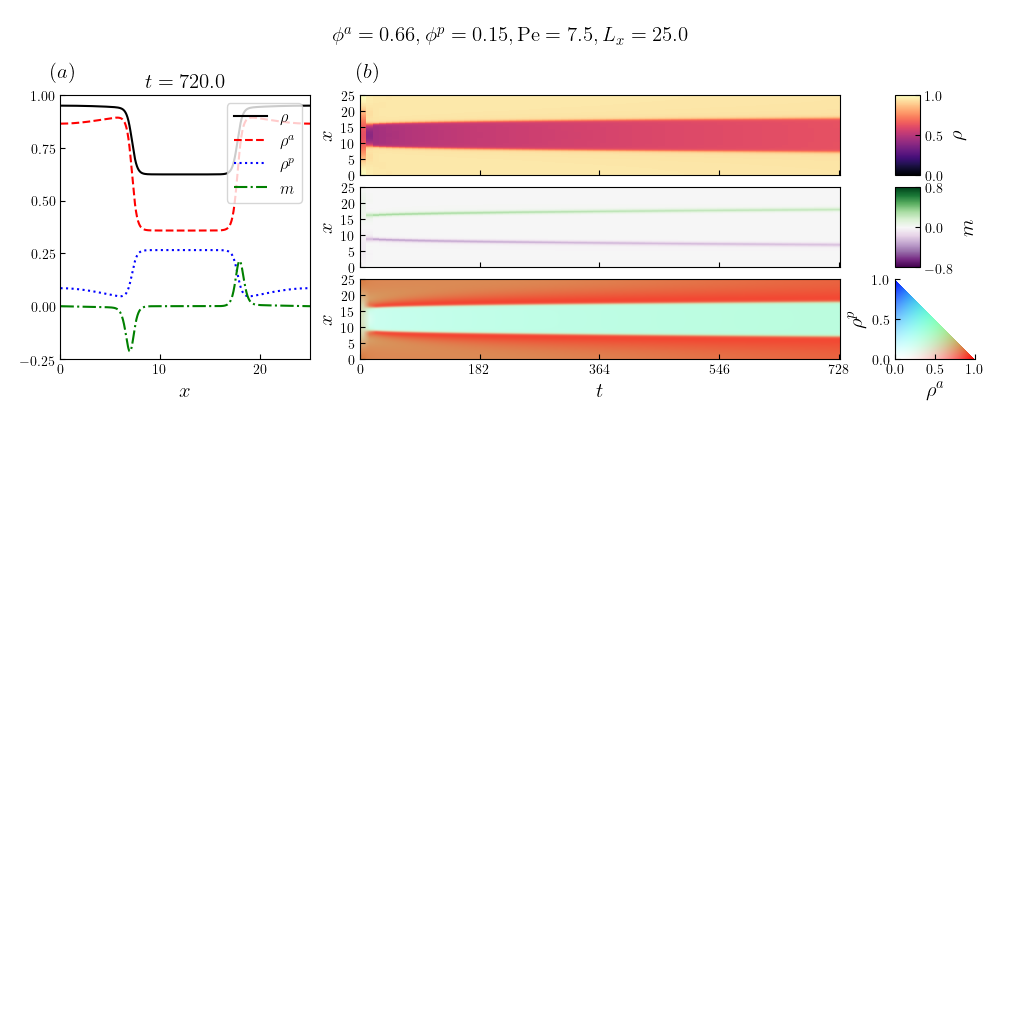

In [37]:
# param = cp_param(134)
ϕa, ϕp = 0.66, 0.15
param = cp_param_coord(ϕa, ϕp);

@unpack Nx, Δx = param
using KernelDensitySJ, Peaks

#load saves
ts, f_saves = load_compress_pde(param);
#process
    ft      = permutedims(reshape(reduce(hcat,f_saves),(Nx,3,:)),(3,1,2))
    # ft      = ft[t_start:1:t_end, : ,: ]
    # ts      = ts[t_start:1:end]
    pk      = find_xpeak_ft(ts , ft; time_length = 0.1)
    centre  = Nx ÷ 2 + 1 
    ft  = circshift(ft, (0,-pk, 0));

    t_pde_rgb_image = rho_to_rgb(ft);
    dt, df = t_dff(ts , ft; N=Nx);

    fts = [ft]
    times = [ts]
    images = [t_pde_rgb_image]
    dts = [dt]
    dfs = [df];

t_max = maximum(ts)
@unpack Lx = param
    rhomax  = 1.0
    rhomin  = 0.0
    mag_lim = 0.8
    height_1 = 0.08
    width_1  = 0.48 #2*0.365
    side_gap_1  = 0.35
    bottom_gap_1  = 0.65
    gap = 0.012

    cbar_y_top = bottom_gap_1 + 3*height_1 + 2*gap
    cbar_width = 0.1
    cbar_y_bot = bottom_gap_1+ gap+ height_1#bottom_gap_1 + cbar_width + 0.02
    cbar_x = 0.885 #1- cbar_width#2*width_1+ 3*side_gap_1


    height_2 = 0.175
    width_2  = height_2
    side_gap_2  = 0.1
    bottom_gap_2  = bottom_gap_1
    gap_2 = 0.06

    t_stamp_x = 0.03
    t_stamp_y = 0.05

    width_3 = 0.25
    start_3 = 0.05

    font = 15

    sf = 1.0
#create plot
    using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig = plt.figure(figsize=(10,Int64(10*sf)))
    ax = fig.add_axes([0,0,1,1],visible=true)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.spines["bottom"].set_visible(false)
    ax.spines["left"].set_visible(false)
    # ax = fig.add_axes([0.775,0,0.225,1],visible=true)
    # ax.xaxis.set_ticks([])
    # ax.yaxis.set_ticks([])
    # ax = fig.add_axes([0.025,0.5,0.95,0.45],visible=true)
    # ax.xaxis.set_ticks([])
    # ax.yaxis.set_ticks([])
# add image
    for (i,(rgb_image,ts)) in enumerate(zip(images, times))
        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1), bottom_gap_1, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]
        t_max = t_end -t_start
        ax.imshow(rgb_image; extent = [t_start,t_end,0,Lx], interpolation = "bilinear")
        #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        ax.get_yaxis().set_ticks(0:5:Lx)
        # ax.set_yticklabels(["0","10","20"])
        ax.get_xaxis().set_ticks([])
        ax.axis([0,t_max, 0, Lx])
        ax.set_aspect((t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = font, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.set_xlabel(L"t", fontsize = font)
        ax.tick_params(labelbottom = true, direction = "in")
    end
# add mats
    for (i,(ts,ft)) in enumerate(zip(times, fts))
        global im1, im2
        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1), bottom_gap_1+2*height_1+2*gap, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]
        t_max = t_end -t_start
        _, Nx, _ = size(ft)

        colmap = PyPlot.plt.cm.magma
        norm1 = matplotlib.colors.Normalize(vmin= rhomin, vmax= rhomax) 
        im1 = ax.matshow((ft[:,Nx:-1:1,1]+ft[:,Nx:-1:1,2]+ft[:,Nx:-1:1,3])'; norm = norm1,  cmap = colmap, extent = [t_start,t_end,0,Lx])

        #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        ax.xaxis.set_ticks([])
        ax.xaxis.tick_bottom()
        ax.get_yaxis().set_ticks(0:5:Lx)
        # ax.set_yticklabels(["0","10","20"])
        ax.axis([0,t_max, 0, Lx])
        ax.set_aspect((t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = font, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.tick_params(labelbottom = false, direction = "in")

        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1),bottom_gap_1+height_1+gap, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]

        colmap = PyPlot.plt.cm.PRGn
        norm1 = matplotlib.colors.Normalize(vmin= -mag_lim, vmax= mag_lim) 
        im2 = ax.matshow((ft[:,Nx:-1:1,2]-ft[:,Nx:-1:1,1])'; norm = norm1,  cmap = colmap, extent = [t_start,t_end,0,Lx])
        
        ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        # ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks(0:5:Lx)
        # ax.set_yticklabels(["0","10","20"])
        ax.xaxis.tick_bottom()
        ax.axis([0,t_max, 0, Lx])
        ax.set_aspect((t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = font, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.tick_params(labelbottom = false, direction = "in")
    end
# add tdiff
    #     for (i,(ts, df)) in enumerate(zip(dts, dfs))
    #         ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1),bottom_gap_1-height_1-gap, width_1, height_1])
    #         t_end = ts[end]
    #         t_start = ts[1]
    #         t_max = t_end -t_start
    #         ax.plot(ts[2:end], df[2:end]; color = "black")
    #         # if i ==1
    #         #     smooth_df = KernelDensitySJ.smooth(ts[2:end],df[2:end],0.2, ts[2:end])
    #         #     ax.plot(ts[2:end], smooth_df; color = "black")
    #         # else
    #         #     ax.plot(ts[2:end], df[2:end]; color = "black")
    #         # end
    #         #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
            
    #         #ax.get_xaxis().set_ticks([])
    #         ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
    #         ax.get_yaxis().set_ticks(0:0.04:0.04)
    #         ax.axis([t_start,t_end, 0, 0.04])
    #         ax.set_aspect((t_max/0.04)*(height_1/width_1)*sf)
    #         ax.set_ylabel(L"\Vert \dot f \Vert_2",fontsize = 15, rotation = 90)
    #         ax.set_xlabel(L"t", fontsize = font)
    #         ax.tick_params(labelbottom = true, direction = "in")
    # end
# add end plot  
    frame = length(ts)-1
    ax = fig.add_axes([start_3, bottom_gap_2, width_3, 3*height_1+2*gap])
    ax.plot(Δx:Δx:Lx, ft[frame,:,2]+ft[frame,:,1]+ft[frame,:,3];
    color = "black", linestyle = "-", label = L"\rho")
    ax.plot(Δx:Δx:Lx, ft[frame,:,1]+ft[frame,:,2]; 
    color = "red", linestyle = "--", label = L"\rho^a")
    ax.plot(Δx:Δx:Lx, ft[frame,:,3]; 
    color = "blue", linestyle = ":",label = L"\rho^p")
    ax.plot(Δx:Δx:Lx, ft[frame,:,2]-ft[frame,:,1]; 
    color = "green", linestyle = "-.", label = L"m")
    

    latex_string = latexstring("\$ t = $(d2(ts[frame]))\$")
    ax.set_title(latex_string, fontsize = font)
    ax.get_xaxis().set_ticks(0:10.0:Lx)
    ax.get_yaxis().set_ticks(-0.25:0.25:1.0)
    # ax.set_xlabel(L"x", fontsize = 15)
    #ax.set_ylabel(L"m",fontsize = font, rotation = 90)
    ax.set_aspect((3*height_1+2*gap)*(Lx/(1.25))/(width_3))
    ax.axis([0,Lx,-0.25,1.0])
    ax.tick_params(direction = "in")
    ax.legend(loc= "upper right", fontsize = 12)
    ax.set_xlabel(L"x", fontsize = 15)

# add colour bars
    # ap cbar
    # cbar_ax = fig.add_axes([cbar_x, bottom_gap_1, cbar_width, cbar_width])
    cbar_ax = fig.add_axes([cbar_x, bottom_gap_2, height_1, height_1])

    Δ = 0.001
    cbar_f = [ x*(x+y≤ 1)*(i != 3)/2 + y*(x+y≤ 1)*(i == 3) for x in Δ:Δ:1, y in Δ:Δ:1, i in 1:3 ]  
    rgb_image = rho_to_rgb(cbar_f );

    ax = cbar_ax
    ax.imshow(rgb_image; extent = [0,1,0,1])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.get_xaxis().set_ticks(0:0.5:1)
    ax.get_yaxis().set_ticks(0:0.5:1)
    ax.set_xlabel(L"\rho^a", fontsize = font)
    ax.set_ylabel(L"\rho^p",fontsize = font, rotation = 90)
    ax.tick_params(direction = "in")
    # rho cbar
    # rho_cbar_ax = fig.add_axes([0.9, cbar_y_bot, 0.025, (cbar_y_top-cbar_y_bot)])
    rho_cbar_ax = fig.add_axes([cbar_x, cbar_y_bot+gap+height_1, 0.025, height_1])
    rho_cbar = fig.colorbar(im1, cax=rho_cbar_ax)
    # rho_cbar_ax.set_title(L"\rho",fontsize=25)
    rho_cbar_ax.set_ylabel(L"\rho",fontsize=font,rotation = 90)
    rho_cbar.set_ticks( rhomin:0.5:rhomax)
    rho_cbar_ax.yaxis.set_ticks_position("right")
    rho_cbar_ax.tick_params(direction = "in")
    # mag cbar
    # mag_cbar_ax = fig.add_axes([0.935, cbar_y_bot, 0.025, (cbar_y_top-cbar_y_bot)])
    mag_cbar_ax = fig.add_axes([cbar_x, cbar_y_bot, 0.025, height_1])
    # mag_cbar_ax.set_title(L"{m}",fontsize=25) #mathbf{}
    mag_cbar = fig.colorbar(im2, cax=mag_cbar_ax)
    mag_cbar.set_ticks((-mag_lim):0.8:mag_lim)
    mag_cbar_ax.tick_params(direction = "in")
    mag_cbar_ax.yaxis.set_ticks_position("right")
    mag_cbar_ax.set_ylabel(L"m",fontsize=font,rotation = 90)
#
#title
    @unpack v0, ϕa, ϕp, Lx = param
    latex_title = latexstring("\$ \\phi^a = $(ϕa), \\phi^p = $(ϕp), \\mathrm{Pe} = $(v0), L_x = $(Lx)\$")
    fig.suptitle(latex_title,fontsize=font)
# labels
    #latex_annotation = latexstring("\$ t = $(round( times[1][end];digits = 1))\$")
    ax.annotate(L"(a)", (start_3, bottom_gap_2+3*height_1+2*gap+0.01), xycoords = "figure fraction", rotation = 0, fontsize = font )
    ax.annotate(L"(b)", (side_gap_1, bottom_gap_2+3*height_1+2*gap+0.01), xycoords = "figure fraction", rotation = 0, fontsize = font )
display(fig)
fig_name = "pde_plot"
     @unpack ϕa, ϕp, v0, Lx = param
     pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)";
     mkpath(pathname)
     filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)/ϕa=$(ϕa)_ϕp=$(ϕp)_v0=$(v0)_Lx=$(Lx).pdf";
     PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)


In [38]:
# add complex turn 
Δϕ = 0.001
Pe = 7.5
file_name = "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/spinodal/Δϕ=$(Δϕ)_Pe=$(Pe).jld2"
data = load(file_name)
@unpack ϕas_left, ϕas_right, ϕps = data



Dict{String, Any} with 3 entries:
  "ϕas_right" => Any[0.92205, 0.92087, 0.919689, 0.918507, 0.917325, 0.916141, …
  "ϕps"       => Any[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.…
  "ϕas_left"  => Any[0.454915, 0.455146, 0.455377, 0.45561, 0.455844, 0.456079,…

In [57]:
length(ϕps), length(ϕas_right), length(ϕas_left)

(369, 369, 369)

In [40]:
ϕps = [y for (x,y) in zip(ϕas_left,ϕps) if x < 0.5 ]
ϕas_right = [y for (x,y) in zip(ϕas_left,ϕas_right) if x < 0.5 ]
ϕas_left = [x for x in ϕas_left if x < 0.5];

In [ ]:
ϕps = [y for (x,y) in zip(ϕas_left,ϕps) if x < 0.5 ]
ϕas_right = [y for (x,y) in zip(ϕas_left,ϕas_right) if x ==y ]
ϕas_left = [x for x in ϕas_left if x < 0.5];

In [56]:
file_name = "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/spinodal/Δϕ=$(Δϕ)_Pe=$(Pe).jld2"
data = load(file_name)
@unpack ϕas_left, ϕas_right, ϕps = data
            ϕps = [z for (x,y,z) in zip(ϕas_left,ϕas_right,ϕps) if (y>0.5)|(z > 0.2) ]
            ϕas_right = [y for (x,y,z) in zip(ϕas_left,ϕas_right,ϕps) if (y>0.5)|(z > 0.2) ]
            ϕas_left = [x for (x,y,z) in zip(ϕas_left,ϕas_right,ϕps) if (y>0.5)|(z > 0.2) ]
            

Dict{String, Any} with 3 entries:
  "ϕas_right" => Any[0.92205, 0.92087, 0.919689, 0.918507, 0.917325, 0.916141, …
  "ϕps"       => Any[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.…
  "ϕas_left"  => Any[0.454915, 0.455146, 0.455377, 0.45561, 0.455844, 0.456079,…